# 0. Import Libraries 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Import data

In [3]:
with open(r'data/yellow_tripdata_2022-01.parquet', 'rb') as f:
    df = pd.read_parquet(f, engine='pyarrow')

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


# 2. Data Exploration

In [5]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [6]:
df = df[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count',
         'trip_distance','RatecodeID','PULocationID','DOLocationID','payment_type','total_amount']]

In [7]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,142,236,1,21.95
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,236,42,1,13.30
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,166,166,1,10.56
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,114,68,2,11.80
4,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,68,163,1,30.30


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E1E12A358>,
      dtype=object)

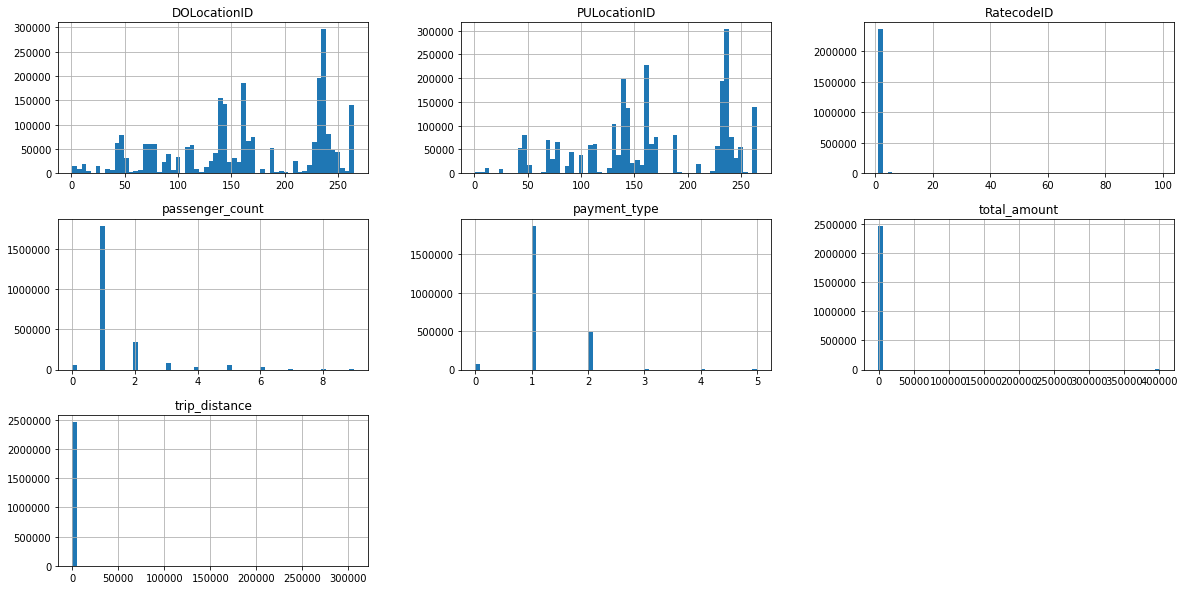

In [8]:
df.hist(figsize=(20,10), bins= 60)

In [11]:
df['RatecodeID'].value_counts()

1.0     2296363
2.0       66623
5.0       13561
99.0       8732
3.0        4014
4.0        3118
6.0          17
Name: RatecodeID, dtype: int64

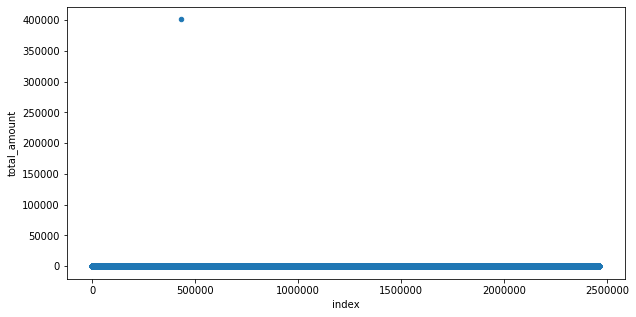

In [12]:
df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

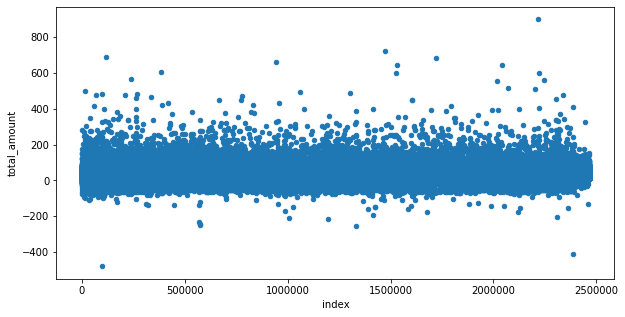

In [13]:
df[df['total_amount'] < 1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

(12934, 9)


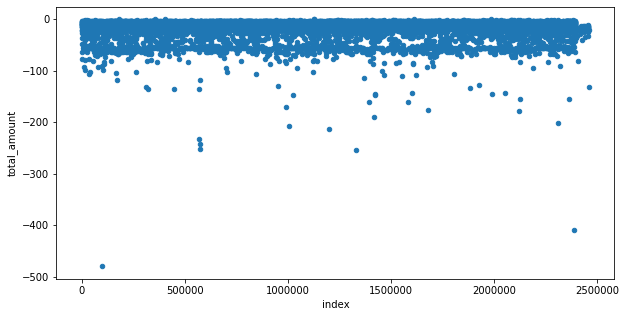

In [16]:
print(df[df['total_amount'] < 0].shape)
df[df['total_amount'] < 0].reset_index().plot(kind='scatter', y='total_amount', x='index',figsize=(10,5))

In [36]:
print(df[df['total_amount'] <= 0].shape)
df[df['total_amount'] <= 0].reset_index().head()

(13408, 9)


,index,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,154,2022-01-01 00:26:37,2022-01-01 00:39:35,1.0,7.38,1.0,132,265,4,-23.55
1,521,2022-01-01 00:27:18,2022-01-01 00:40:50,1.0,5.14,1.0,152,48,4,-20.80
2,523,2022-01-01 00:59:33,2022-01-01 01:14:09,4.0,5.37,5.0,50,265,2,-77.80
3,580,2022-01-01 00:16:58,2022-01-01 00:19:41,1.0,0.46,1.0,90,234,2,-7.80
4,714,2022-01-01 00:29:12,2022-01-01 00:40:29,1.0,3.13,1.0,13,246,4,-15.80


In [39]:
df[df['total_amount'] <= 0]['payment_type'].value_counts()

4    7445
3    3267
2    2358
1     298
0      40
Name: payment_type, dtype: int64

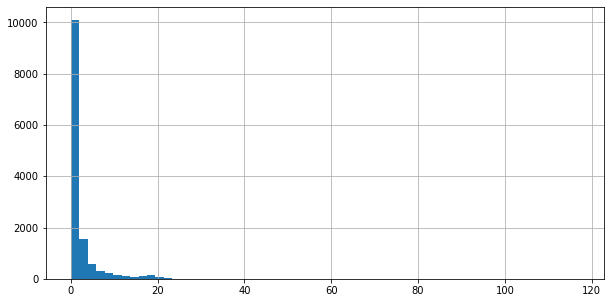

In [40]:
df[df['total_amount'] <= 0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [41]:
df[df['total_amount'] <= 0]['trip_distance'].value_counts()

0.00     2022
0.01      345
0.02      237
0.03      192
0.04      145
0.05      130
0.07       83
0.06       80
0.08       78
0.80       77
0.12       74
0.10       73
0.73       72
0.72       71
0.76       70
0.84       69
0.62       69
0.83       69
0.85       68
0.66       68
0.90       67
0.60       66
0.61       65
0.67       65
0.77       64
0.57       64
0.48       64
0.78       63
0.69       62
0.81       62
         ... 
21.43       1
17.32       1
13.23       1
5.48        1
17.26       1
13.78       1
6.04        1
13.28       1
15.08       1
10.50       1
10.49       1
19.38       1
8.25        1
9.12        1
13.34       1
7.87        1
4.65        1
10.96       1
10.48       1
8.29        1
8.65        1
16.74       1
20.61       1
20.33       1
8.55        1
21.72       1
10.67       1
6.75        1
5.09        1
21.88       1
Name: trip_distance, Length: 1363, dtype: int64

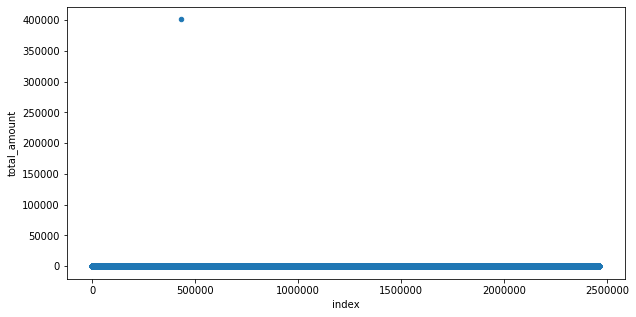

In [42]:
df.reset_index().plot(kind = 'scatter', y='total_amount', x = 'index', figsize = (10,5))

In [45]:
df[df['total_amount']>150].shape

(1378, 9)

In [47]:
df['total_amount'].mean()

19.16937009586583